# Image Object (PIL, pillow) handling

## With Numpy

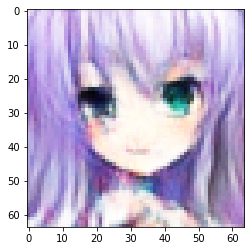

(3, 64, 64, 3)


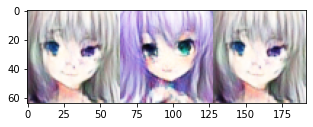

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

#return PIL object
def load_image_obj(ImagePath):
    image =  Image.open(ImagePath).convert('RGB')
    #return np.asarray(image)
    return image

#return list of PIL objects
def load_images_from_directory(root):
    images = []
    image_files = os.listdir(root)
    for i in range(len(image_files)):
        if image_files[i].lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            img = load_image_obj(root + image_files[i])
            images.append(img)
    return images

def display_single_image(ImagePath):
    img = load_image_obj(ImagePath)
    plt.imshow(img)
    plt.show()

def display_multiple_images_grids(image_list, n_cols):
    images_ = []
    for img in image_list:
        images_.append(np.asarray(img))
        
    image_array = np.array(images_)
    print(image_array.shape)
    index, height, width, channels = image_array.shape
    if index%n_cols != 0:
        print("\nGrid images not available")
        return None
    n_rows = (index)//n_cols
    
    image_grid = (image_array.reshape(n_rows, n_cols, height, width, channels)
                  .swapaxes(1,2)
                  .reshape(height*n_rows, width*n_cols, -1))
    plt.figure(figsize=(5., 5.))
    plt.imshow(image_grid)
    return image_grid

def save_image_object(image, filename):
    image.save(filename)
    
path = '../data/g-images-0002.png'
display_single_image(path)

image_list = load_images_from_directory('../data/')
display_multiple_images_grids(image_list, 3)

save_image_object(image_list[0], '../data/newfile.png')

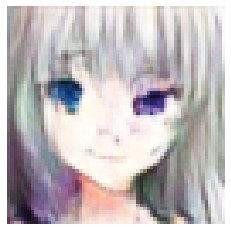

In [35]:
# animation display
import matplotlib.animation as animation
from IPython.display import HTML

path = '../data'
image_names = os.listdir(path)
img_list = []

for i in range(len(image_names)):
    if image_names[i].lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        img = Image.open(os.path.join(path, image_names[i]))
        #img_list.append(transforms.ToTensor()(img))
        img_list.append(img)
    
fig = plt.figure(figsize=(8,4))
plt.axis("off")
ims = [[plt.imshow(i, animated=True)] for i in img_list]
#ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

## Torch image tensor

In [11]:
import torch, torchvision
from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
%matplotlib inline

cuda = torch.cuda.is_available()
if cuda:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

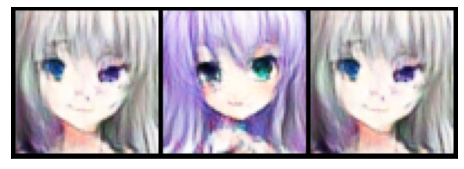

In [38]:
# loading image(PIL) object
ImageSize = 64
def denorm(img_tensors):
    return img_tensors * 0.5 + 0.5

transformN = transforms.Compose([transforms.Resize(ImageSize),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

def imageObject_to_tensor(image, transform, device):
    if transform == None:
        img_tensor = transforms.ToTensor()(image)
    else:
        img_tensor = transform(image)
    return img_tensor.to(device)

def images_to_tensors(image_list, nc, ImageSize, transform):
    num_of_images = len(image_list)
    images_in_tensor = torch.zeros(num_of_images, nc, ImageSize, ImageSize, dtype=torch.float64)
    for i, img in enumerate(image_list):
        images_in_tensor[i] = imageObject_to_tensor(img, transform, device)
    return images_in_tensor

def display_tensor_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach().cpu()[:nmax]), nrow=8).permute(1, 2, 0))

    
image_list = load_images_from_directory('../data/')

tensor_images = images_to_tensors(image_list, 3, 64, transformN)
display_tensor_images(tensor_images)


Saving... test.jpg


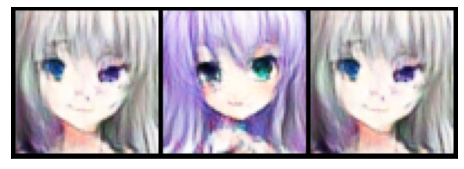

In [37]:
# torch saving tensor image object
import os
saving_dir = '../data/generated'
os.makedirs(saving_dir, exist_ok=True)

def save_single_tensor_image(filename, tensor_image):
    save_image(denorm(tensor_image), os.path.join(saving_dir, filename))
    
def save_individuals(filename, tensor_images):
    for i in range(len(tensor_images)):
        fname = filename + '{0:0=4d}.png'.format(i)
        save_image(denorm(tensor_images[i]), os.path.join(saving_dir, fname))
    
def save_tensor_images_in_grids(filename, tensor_images, show=True):
    save_image(denorm(tensor_images), os.path.join(saving_dir, filename), nrow=8)
    print('Saving...', filename)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(tensor_images.cpu().detach(), nrow=8).permute(1, 2, 0))
        plt.show()

        
save_individuals('test-', tensor_images)

save_tensor_images_in_grids('test.jpg', tensor_images)